# 1)some explanations on importing data
**if you haven't imported data from alpha_vantage yet**
keep in mind that the udemy course was recorded in March 2017
all data will be imported as csv file and imported into your script as a pandas dataframe object
make sure you have a folder created named '/data' - just where in the folder where you run this script from
copy the file myalphautil.py and myalpha.py into your working folder
in myalpha.py put in your alpha-vantage API-Key where the placeholder  and save the file
then do:
```
import myalpha_util as myau
import myalpha 
import os
api_key_alpha = myalpha.secret['api_key_alpha']
function='TIME_SERIES_DAILY_ADJUSTED'
symbol_list=['PG','SPY']
myau.get_alphav_10symbols(symbol_list,api_key_alpha,function)
```

*you can set and ticker/symbols you like - find the symbols alpha vantage is working with using its google worksheet utility - this googles excel with the alpha-vantage add-in you import from google (read the help and if you know how excel formulas work there is alpha-specific formula imported from the add-in to search symbols by a description string*
*PG is symbol for procter & gamble
indexes are not available in alpha_vantage but you can have ETFs mirroring one
SPY is symbol for an ETF mirroring S&P 500 (SPY is a perfect substitute for S&P500 index)
myau.get_alphav_10symbols(symbol_list, api_key_alpha)
myau.update_index2timedate_csv(symbol_list)*

In [ ]:
from scipy import stats

import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
#plots graphs below code cells and stores them in notebook document

In [5]:
#these are utility functions for Udemy-course: Python for Finance: Investment Fundamentals & Data Analytics
#we use alpha_vantage to retrieve data as csv and store them locally for re-use
#~in anaconda 3 python3.7 all modules are store in ~/opt/anaconda3/lib/python3.7/site-packages
import numpy as np
import pandas as pd
#from alpha_vantage.timeseries import TimeSeries
from pprint import pprint

In [ ]:
import myalpha
api_key_alpha = myalpha.secret['api_key_alpha']

print(api_key_alpha)


In [ ]:
#if your csv is out-dated (less than 100days)then you can update it by using update_csv
#this will retrieve the last 100days of you symbols from alpha_vantage and append the ones missing in 
#your csv - it will write back the csv file with the appended registries 
import myalpha_util as myau
symbol_list=['PG','SPY']
myau.update_csv(symbol_list,api_key_alpha)

*the following code assumes that the 'data' folder is created and csv files imported for the symbol_list 'PG'and 'SPY'*

In [ ]:
# this is just to test if you have data in your /data folder
import myalpha_util as myau
symbol_list=['PG','SPY']
start='2020-01-01'
end='2020-02-14'
for symbol in symbol_list:
    df = myau.get_daily_symbol(symbol,start,end)
    print("symbol: " + symbol)
    df.head()
    df.tail()
    df.index
    print(df.head(1))

## once you have imported data you can now compose your portfolio


In [1]:
#compose a n-column portfolio with the daily price just as in the udemy course
#you need to have imported the csv files first - just as described earlier
import myalpha_util as myau
symbol_list=['PG','SPY']
start='2010-01-01'
end='2017-03-24'
#usecols=['timestamp','adjusted_close', 'volume']
pf_data=myau.compose_portfolio(symbol_list,start,end)
pf_data.info()
pf_data.size
print("_____________________________")
pf_data.head(1)
pf_data.tail(1)
print("_____________________________")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1819 entries, 2010-01-04 to 2017-03-24
Data columns (total 2 columns):
PG     1819 non-null float64
SPY    1819 non-null float64
dtypes: float64(2)
memory usage: 42.6 KB


3638

_____________________________


,PG,SPY
timestamp,,
2010-01-04,44.3197,92.7692


,PG,SPY
timestamp,,
2017-03-24,82.6325,221.8884


_____________________________


# 2)Markowitz Portfolio Optimization
*part II of Udemy course python for finance investment fundamentals  data analytics*

PG     44.3197
SPY    92.7692
Name: 2010-01-04 00:00:00, dtype: float64

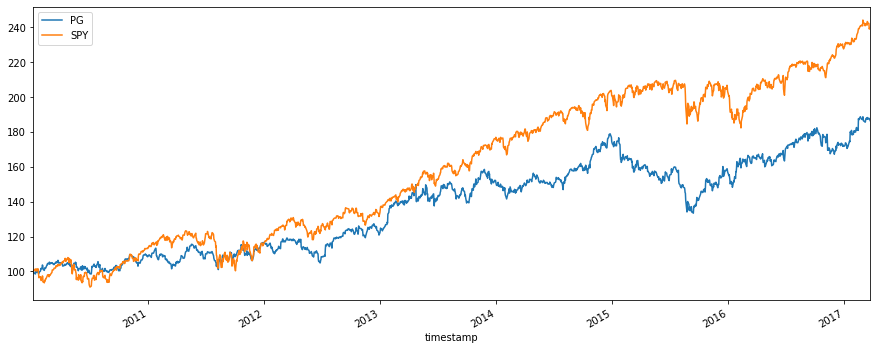

In [3]:
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
#plots graphs below code cells and stores them in notebook document


pf_data.iloc[0]
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(15, 6))

In [6]:
import numpy as np
log_returns=np.log(pf_data / pf_data.shift(1))
log_returns.head(3)
log_returns.tail(3)

,PG,SPY
timestamp,,
2010-01-04,NaN,NaN
2010-01-05,0.000327,0.002644
2010-01-06,-0.004755,0.000704


,PG,SPY
timestamp,,
2017-03-22,-0.002195,0.002350
2017-03-23,-0.002422,-0.001068
2017-03-24,-0.002205,-0.000727


In [7]:
log_returns.mean()*250


PG     0.085667
SPY    0.119920
dtype: float64

In [8]:
log_returns.cov()*250

,PG,SPY
PG,0.020098,0.012389
SPY,0.012389,0.023108


In [9]:
log_returns.corr()
# well correlated if correlation r**2 is higher then 30%

,PG,SPY
PG,1.000000,0.574863
SPY,0.574863,1.000000


## first we must obtain an optimization of portfolios
**we obtain number of stocks in portfolio (here it is 2)**
**we first create 2 random weight**

In [11]:
num_assets
arr = np.random.random(2)
arr
arr[0]+arr[1]

2

array([0.30332787, 0.55138092])

0.8547087891043859

In [12]:
#generate weights for portfolio that add up to 1
#with np.random.random(num_assets=2) we get 2 random values from 0 to 1
#but the random values do not add up to 1 unless you do a trick weights /= np.sum(weights)
weights=np.random.random(num_assets)
###########################
weights /= np.sum(weights)
##########################
weights
weights[0]+weights[1]
#this works because weights is an array(w1,w2) and w1/(w1+w2) + w2/(w1+w2) = (w1+w2)/(w1+w2)

array([0.12472475, 0.87527525])

1.0

## calculate expected portfolio return for 1000 combinations of a portfolio

In [13]:
log_returns.mean()
np.sum(weights * log_returns.mean())*250

PG     0.000343
SPY    0.000480
dtype: float64

0.1156480564678114

In [15]:
#portfolio Variance
pfolio_var=np.dot(weights.T, np.dot(log_returns.cov()*250, weights))
pfolio_var

0.02072074285990837

In [21]:
#portfolio volatility
pfolio_vol=pfolio_var**0.5
pfolio_vol
print(str(round(pfolio_vol,5)*100)+'%')


0.1439470140708322

14.395%


In [29]:
num_assets=len(symbol_list)
pfolio_returns=[]
pfolio_vols=[]
#create 1000 combinations of portfolios for PG and SPY
for x in range(1,1000,1):
    weights=np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean())*250)
    pfolio_vols.append(np.dot(weights.T, np.dot(log_returns.cov()*250, weights))**0.5)

#convert lists into numpy arrays
pfolio_returns = np.array(pfolio_returns)
pfolio_vols = np.array(pfolio_vols)

pfolio_returns[0]
pfolio_returns[-1]
print("###########")
pfolio_vols[0]
pfolio_vols[-1]


0.11471922046039801

0.11640096619479563

###########


0.14239941670252873

0.1452578604255024

## plot the returns vs volatility(risk) of the portfolio
*in order to do that create a dataframe object consisting of the arrays using the dictionary syntax for creation*


In [31]:
portfolios=pd.DataFrame({'Return': pfolio_returns, 'Volatility':pfolio_vols})
portfolios.head()
portfolios.tail()


,Return,Volatility
0,0.114719,0.142399
1,0.103844,0.130788
2,0.087982,0.138348
3,0.098107,0.130111
4,0.106487,0.132418


,Return,Volatility
994,0.118626,0.149413
995,0.099139,0.129940
996,0.105941,0.132015
997,0.100924,0.129948
998,0.116401,0.145258


Text(0.5, 0, 'Expected Volatility')

Text(0, 0.5, 'Expected Return')

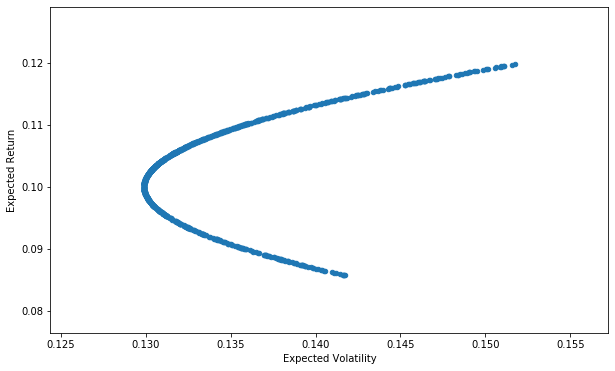

In [33]:
portfolios.plot(x='Volatility',y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

# 3) The Capital Asset Pricing Model CAPM
**if you have data in /data folder execute scripts from here:**
<br />
**if not go back to 1)**


In [3]:
#these are utility functions for Udemy-course: Python for Finance: Investment Fundamentals & Data Analytics
#we use alpha_vantage to retrieve data as csv and store them locally for re-use
#~in anaconda 3 python3.7 all modules are store in ~/opt/anaconda3/lib/python3.7/site-packages

import numpy as np
import pandas as pd
#from alpha_vantage.timeseries import TimeSeries
from pprint import pprint

In [4]:
import myalpha
api_key_alpha = myalpha.secret['api_key_alpha']

print(api_key_alpha)

77K8XPSR3XWWZJ80


In [5]:
#compose a n-column portfolio with the daily price just as in the udemy course
#you need to have imported the csv files first - just as described earlier
import myalpha_util as myau
symbol_list=['PG','SPY']
start='2012-01-01'
end='2016-12-31'
#usecols=['timestamp','adjusted_close', 'volume']
data=myau.compose_portfolio(symbol_list,start,end)
data.info()
data.size
print("_____________________________")
data.head(1)
data.tail(1)
print("_____________________________")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 2 columns):
PG     1258 non-null float64
SPY    1258 non-null float64
dtypes: float64(2)
memory usage: 29.5 KB


2516

_____________________________


,PG,SPY
timestamp,,
2012-01-03,51.5603,108.6437


,PG,SPY
timestamp,,
2016-12-30,76.1113,211.1668


_____________________________


In [6]:
sec_returns = np.log( data / data.shift(1))

In [7]:
cov = sec_returns.cov() *250
# the cov between PG and the market (SPY = S&P) is the cov of the market
cov

,PG,SPY
PG,0.020395,0.010054
SPY,0.010054,0.016256


In [8]:
# the cov between PG and the market (SPY = S&P) is the cov of the market
cov_with_market = cov.iloc[0,1]
cov_with_market

0.010053736286151504

In [9]:
market_var = sec_returns['SPY'].var()*250
market_var

0.016256310743303845

** Beta: **
### $$ 
\beta_{pg} = \frac{\sigma_{pg,m}}{\sigma_{m}^2}
$$

In [10]:
PG_beta = cov_with_market / market_var
PG_beta
#in the udemy course the number is 0.61595 - 
#the difference is because we do not exactly have the market-var calculated 
#but an approximation by its proxy value (the future SPY) - but it's close enough

0.6184512860824065

**Calculate the expected return of P&G (CAPM):**
### $$
\overline{r_{pg}} = r_f + \beta_{pg}(\overline{r_{m}} - r_f) 
$$
Assume a risk-free rate of 2.5% and a risk premium of 5%. <br />
Estimate the expected return of Microsoft.

<br />
note: depending on the date this risk-free rate is different - for example, on march 2020 the yield for 10y US bonds was 0.76% not 2.5% as in march 2017 which is when the course was recorded orginally

In [11]:
sec_returns.mean()*250
#market return  => proxy S&P annual return
#market return was about 13% for the time period observed but historically this is quite high
#a market return of 7.5% is more conservative - substract the risk-free rate of 2.5% and you 
#obtain a risk premium

PG     0.077455
SPY    0.132175
dtype: float64

In [14]:
risk_free_rate = 0.025
risk_premium = 0.05
#risk_premium = sec_returns['SPY'].mean()*250 - risk_free_rate
PG_er = risk_free_rate + PG_beta * risk_premium
PG_er
# if we want to calculate the numbers for current date we need to compose a portfolio with last 3-5y until this date



0.05592256430412033

**Sharpe ratio:**
### $$
Sharpe = \frac{\overline{r_{pg}} - r_f}{\sigma_{pg}}
$$

In [27]:
sharpe=(PG_er - 0.025)/(sec_returns['PG'].var()*250)**0.5
#or: sharpe=(PG_er - 0.025)/(sec_returns['PG'].std()*250**0.5)
sharpe


0.21653002446999012